In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

colour_pal = sns.color_palette()

In [12]:
df = pd.read_excel("/Users/anurag/Desktop/Computer Science/Monash/2023/FIT3164 Data Science Project Semester 2/Electricity-Demand-Forecasting/Data/Training Data/FirstHalfActuals.xlsx")
df2 = pd.read_excel("/Users/anurag/Desktop/Computer Science/Monash/2023/FIT3164 Data Science Project Semester 2/Electricity-Demand-Forecasting/Data/Training Data/SecondHalfActuals.xlsx")

#Create a overall dataset
df = pd.concat([df, df2], axis = 0)
df = df.set_index("Time")

#Create a dataset with just time and load
df_load = df.iloc[:,0].to_frame()

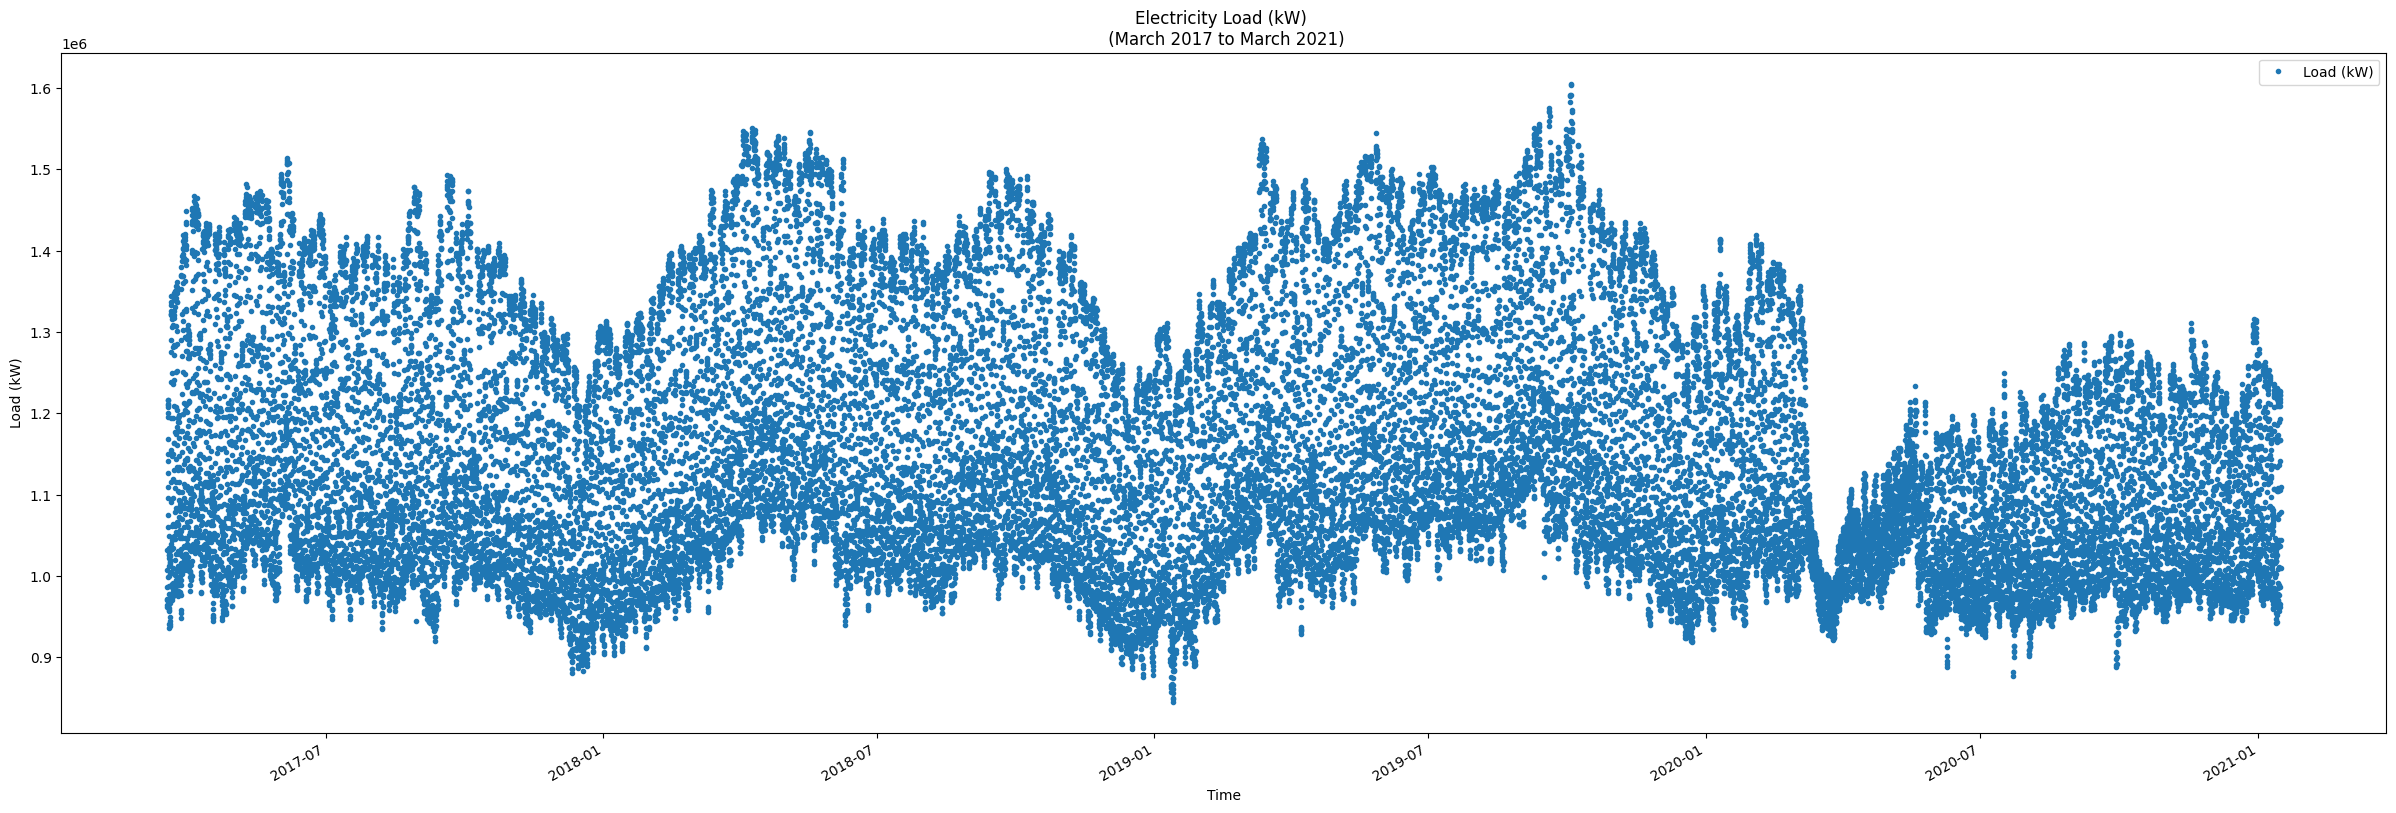

In [24]:
df_load.plot(style = ".", 
             figsize = (30, 10), 
             color = colour_pal, 
             title = "Electricity Load (kW) \n (March 2017 to March 2021)",
             ylabel = "Load (kW)")

plt.show()


### Observing Load : Overall
- We observe from above that the following dataset is clearly seasonal. During the last few months of each year there is a great decrease in electricity demand and load overall in the city. It is also important to note that these drops begin just before the end of the year and begin to reach their peaks again towards the end of the summer months. This signified that there is a surge in load over the colder months of the year, indicating that this may be due to the use greater use of heaters and other winter related appliances. 

- What is also visible is that there is a significant decrease in electricity demand in the first quarter of the year 2020, this is the time where the COVID-19 pandemic hit Australia. The pandemic led to industries being forced to shut down and the inclusion of remote work for workers to comply to COVID-19 protocols. This signifies that this area may be in an industrialised. This insight is further supported by observing that where there is supposed to be a peak in load with respect to previous data, there is actually a trough.

### Observing Load : Over Different Periods

In [62]:
def create_features(input_df):
    """
    Creating specific time segments from datetime.
    """
    #Since we set time as index we can use df.index
    
    input_df["hour"] = input_df.index.hour
    input_df["dayofweek"] = input_df.index.day_of_week #Monday = 0, Sunday = 6
    input_df["quarter"] = input_df.index.quarter
    input_df["month"] = input_df.index.month
    input_df["year"] = input_df.index.year

    return input_df

df_load = create_features(df_load)

<Axes: xlabel='hour', ylabel='Load (kW)'>

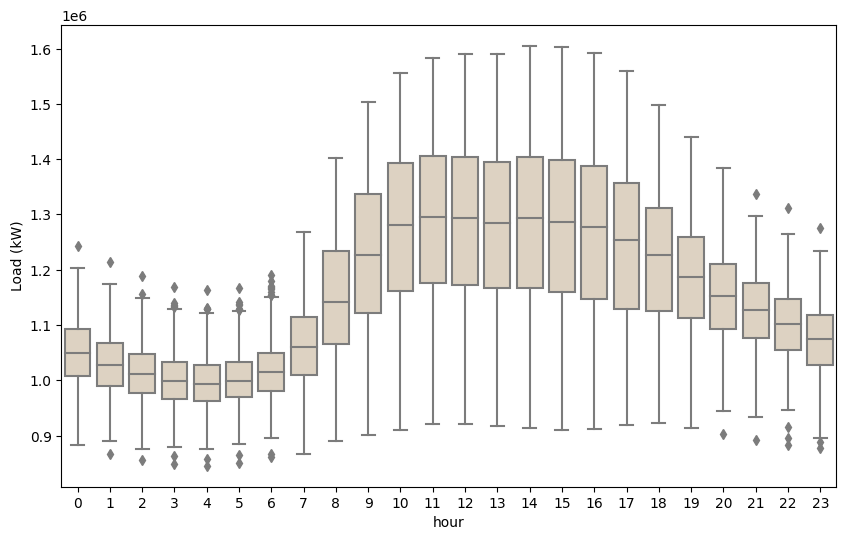

In [63]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load, x = "hour", y = 'Load (kW)', color = "#E1D3BE")

<Axes: xlabel='dayofweek', ylabel='Load (kW)'>

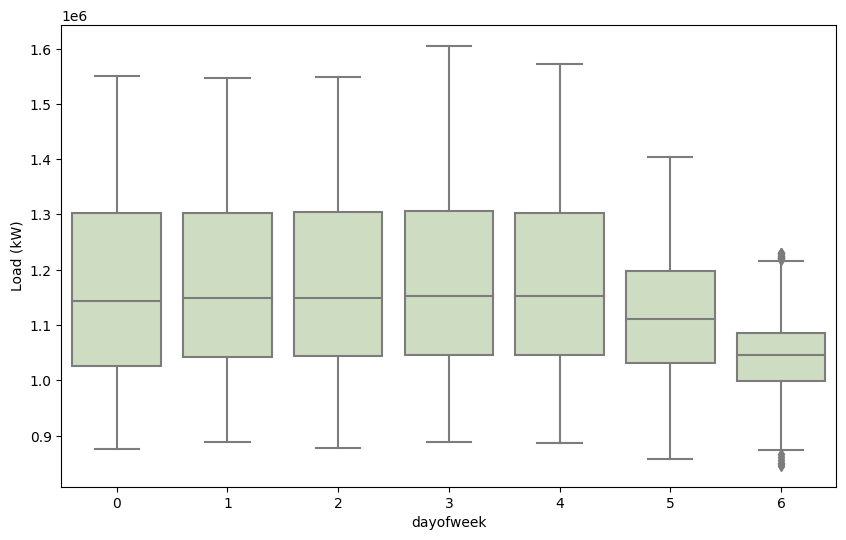

In [64]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load, x = "dayofweek", y = 'Load (kW)', color = "#CEE1BE")

<Axes: xlabel='month', ylabel='Load (kW)'>

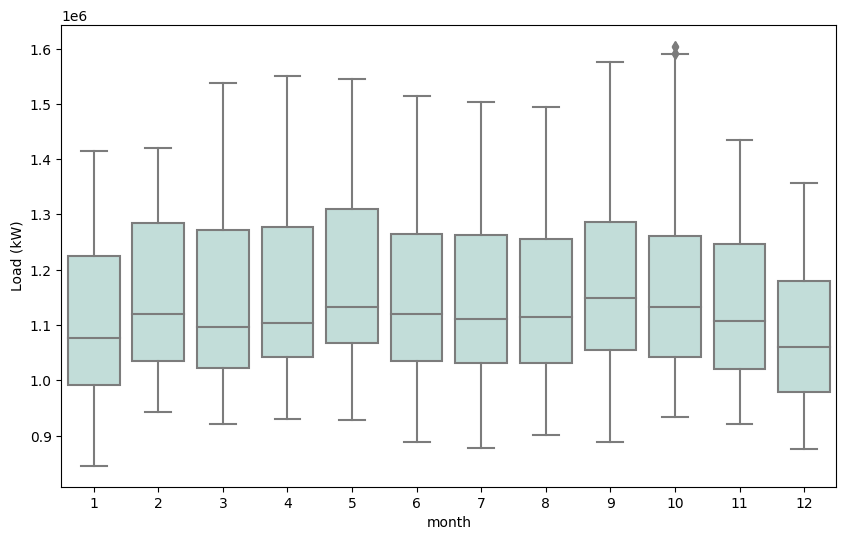

In [65]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load, x = "month", y = 'Load (kW)', color = "#BEE1DC")

<Axes: xlabel='year', ylabel='Load (kW)'>

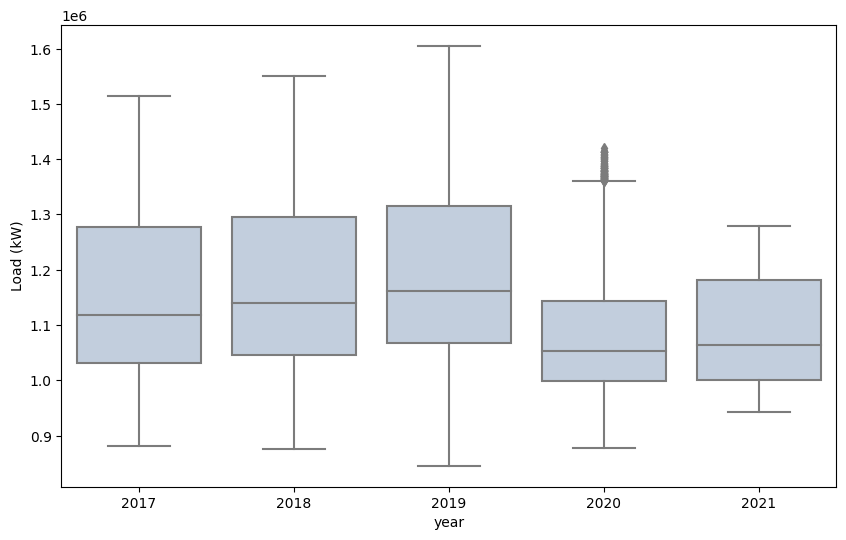

In [66]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load, x = "year", y = 'Load (kW)', color = "#BECDE1")